In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [152]:
data_frame = pd.read_csv('data.csv')

In [153]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [154]:
Y = data_frame['diagnosis']
Y = Y.map({'M': 1, 'B': 0}).astype(int)
data_frame['diagnosis'] = Y

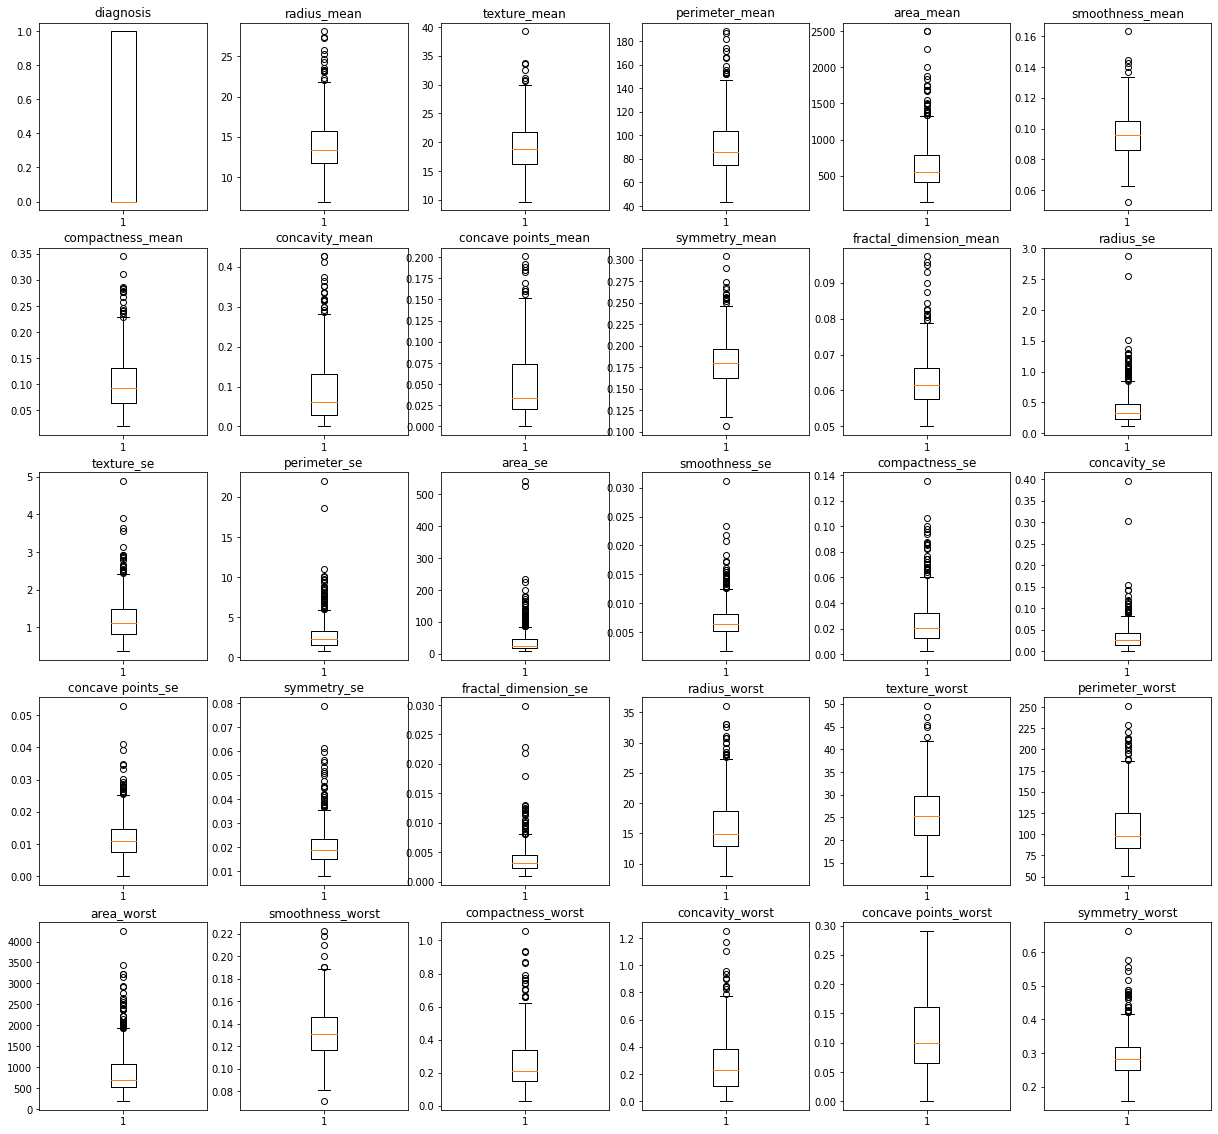

In [155]:
import seaborn as sns
plt.figure(figsize=(21,20))
for i in np.arange(1,31):
    temp = data_frame.iloc[:,i]
    plt.subplot(5,6,i)
    plt.boxplot(temp)
    plt.title(data_frame.columns[i])
plt.show()

<AxesSubplot:>

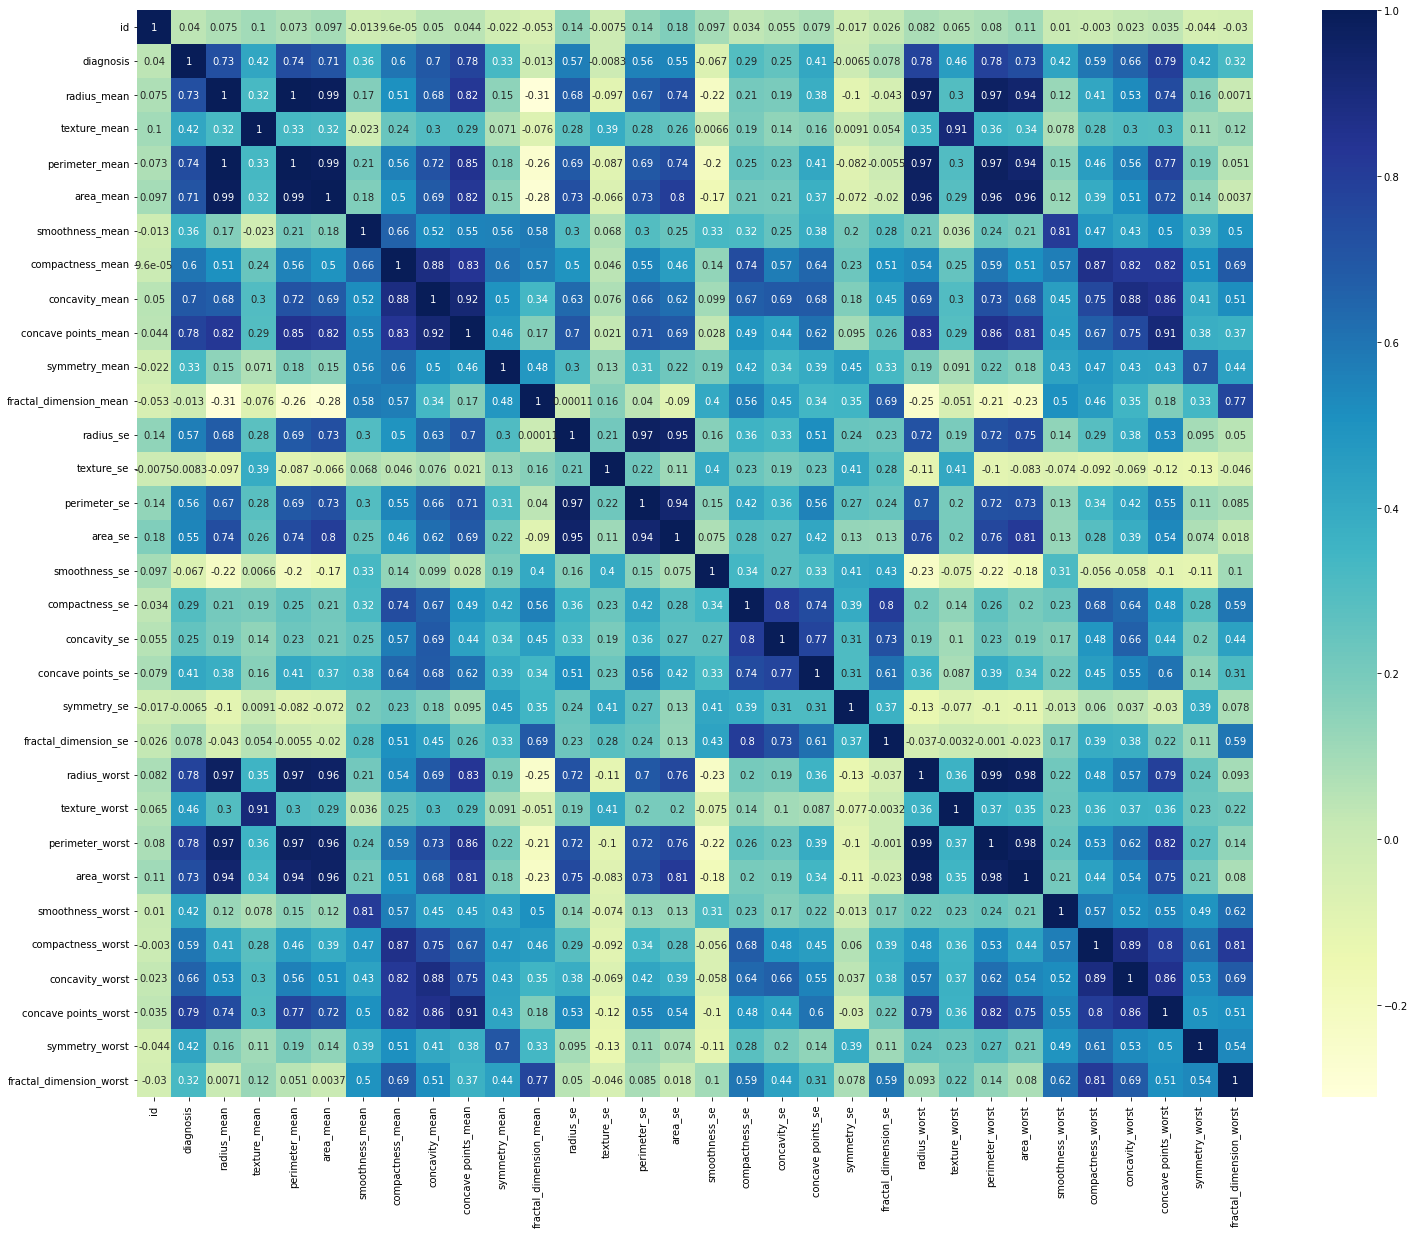

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
corr = data_frame.corr()
# corr.style.background_gradient(cmap='YlGnBu')
import seaborn as sns
sns.heatmap(corr,cmap='YlGnBu',annot=True)

In [157]:
Y = data_frame['diagnosis']

In [158]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [159]:
data_frame = data_frame.drop(columns=['diagnosis','id'],axis=1)

In [160]:
X = data_frame
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()

In [163]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=35,stratify=Y)

In [164]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.fit_transform(X_test)

### Neural Network 

In [165]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

Setting the layers of NN

In [166]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20,activation='tanh'),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')
                        ])

In [167]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

Training the NN

In [168]:
history = model.fit(X_train_std,Y_train,validation_split=0.25,epochs=50)

Epoch 1/50
11/11 [==============================] - 2s 54ms/step - loss: 0.6071 - accuracy: 0.7038 - val_loss: 0.4659 - val_accuracy: 0.8509
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 0.3954 - accuracy: 0.9179 - val_loss: 0.3185 - val_accuracy: 0.9298
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 0.2773 - accuracy: 0.9384 - val_loss: 0.2350 - val_accuracy: 0.9386
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 0.2090 - accuracy: 0.9472 - val_loss: 0.1834 - val_accuracy: 0.9386
Epoch 5/50
11/11 [==============================] - 0s 13ms/step - loss: 0.1656 - accuracy: 0.9619 - val_loss: 0.1501 - val_accuracy: 0.9649
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 0.1375 - accuracy: 0.9707 - val_loss: 0.1266 - val_accuracy: 0.9649
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.1171 - accuracy: 0.9736 - val_loss: 0.1104 - val_accuracy: 0.9737
Epoch 8/50
11

Visualizing Acc and Loss

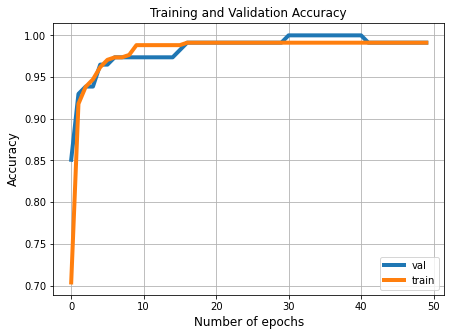

In [169]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

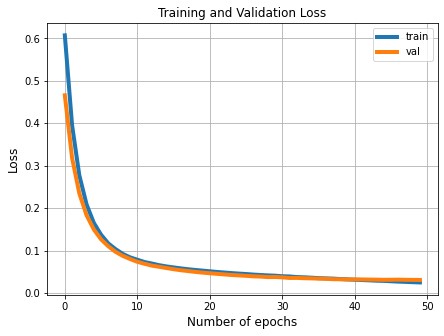

In [170]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [171]:
loss,accuracy = model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.1272 - accuracy: 0.9561


In [172]:
X_test_std[0]

array([-0.00949179,  0.67781495,  0.20017636, -0.1225708 ,  1.37603407,
        2.50485899,  1.74545609,  0.99058389,  1.11856944,  1.86799457,
       -0.82421278, -0.13671264, -0.45227502, -0.53214944, -0.26685881,
        1.68593907,  0.63065601,  0.77833075, -0.20227101,  1.35904463,
       -0.17105496,  0.9577164 ,  0.18485027, -0.24562784,  1.63479742,
        3.26917334,  1.9003118 ,  1.66430266,  1.15491273,  3.29175328])

In [178]:
test_pred = model.predict(X_test_std)
test_pred[0]

array([0.09558068, 0.9036826 ], dtype=float32)

In [179]:
prediction_labels = [np.argmax(i) for i in test_pred]

In [180]:
prediction_labels

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1]

In [182]:
test_input = (12.05,14.63,78.04,449.3,0.1031,0.09092,0.06592,0.02749,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.01427,0.02322,0.00566,0.01428,0.002422,13.76,20.7,89.88,582.6,0.1494,0.2156,0.305,0.06548,0.2747,0.08301)
test_input = np.asarray(test_input)
test_input = test_input.reshape(1,-1)
# test_input_std = scaler.fit_transform(test_input)

prediction = model.predict(test_input)
prediction_labels = [np.argmax(prediction)]

print(prediction_labels)
print(prediction)

if prediction_labels[0] == 1:
    print("The Tumour is Malignant")
else:
    print("The Tumour is Benign")

[1]
[[0.03316455 0.9658549 ]]
The Tumour is Malignant
